<a href="https://colab.research.google.com/github/phmagalhaes88/EDA/blob/main/Uma_introdu%C3%A7%C3%A3o_ao_Python_para_ECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma introdução ao Python para Estatística e Ciência de Dados


por **Cibele Russo**

Semana da Estatística da UFAM

**Link para este notebook: https://bit.ly/3Tny9ce**





## Visualização e Exploração de dados


(Utilize Shift+Enter para executar e avançar para a próxima célula).

In [ ]:
# Importando bibliotecas

import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

# Ajuste de estilo de gráficos
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,7)

# Dados banco - Leitura dos dados diretamente do github
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/IntroducaoaInferenciaEstatistica/main/Dados/dados_banco.csv', index_col=0)
dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
75928,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
52921,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
8387,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
54522,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
45397,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


In [ ]:
# Tabela de frequências absolutas

tab = pd.crosstab(index=dados['Empresa'], columns='count')
tab

col_0,count
Empresa,
Autônomo,1447
Privada,6103
Pública,2450


In [ ]:
# Tabela de frequências relativas - dupla entrada

tab = pd.crosstab(index=dados['Empresa'], columns=dados['Sexo'], normalize='index')
tab

Sexo,F,M
Empresa,,
Autônomo,0.604699,0.395301
Privada,0.335409,0.664591
Pública,0.534286,0.465714


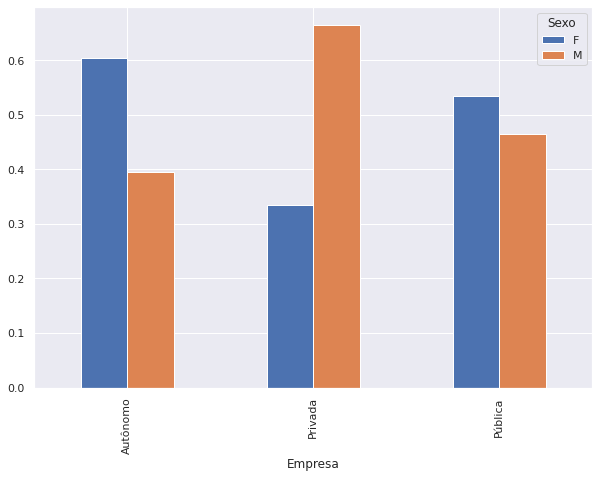

In [ ]:
tab.plot.bar()
plt.legend(title='Sexo')

plt.show()

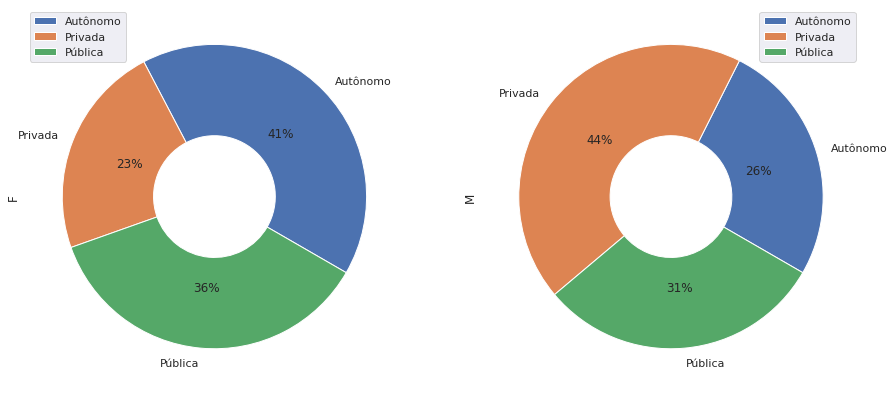

In [ ]:
plot = tab.plot.pie(subplots=True, figsize=(15,9), wedgeprops=dict(width=.6),  autopct='%.0f%%',startangle = -30)

In [ ]:
# Estatísticas descritivas

dados.describe()


,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49897.977700,31.801900,5482.880238,773.441611,2224.517679,1476.939508,2737.210731,0.246100
std,28829.815505,2.931913,393.779438,246.932963,5668.740769,3920.049185,1994.877093,0.430759
min,6.000000,21.000000,4325.720000,-280.670000,0.000000,0.000000,0.000000,0.000000
25%,25067.000000,30.000000,5207.540000,599.425000,0.000000,0.000000,1186.807500,0.000000
50%,49836.000000,32.000000,5498.780000,766.000000,0.000000,0.000000,2692.935000,0.000000
75%,74699.250000,34.000000,5738.220000,941.470000,0.000000,0.000000,4058.565000,0.000000
max,99993.000000,50.000000,8582.000000,2007.260000,23336.420000,21810.520000,12312.220000,1.000000


In [ ]:
dados.loc[:,dados.columns != 'Cliente'].describe()

,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31.801900,5482.880238,773.441611,2224.517679,1476.939508,2737.210731,0.246100
std,2.931913,393.779438,246.932963,5668.740769,3920.049185,1994.877093,0.430759
min,21.000000,4325.720000,-280.670000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,5207.540000,599.425000,0.000000,0.000000,1186.807500,0.000000
50%,32.000000,5498.780000,766.000000,0.000000,0.000000,2692.935000,0.000000
75%,34.000000,5738.220000,941.470000,0.000000,0.000000,4058.565000,0.000000
max,50.000000,8582.000000,2007.260000,23336.420000,21810.520000,12312.220000,1.000000


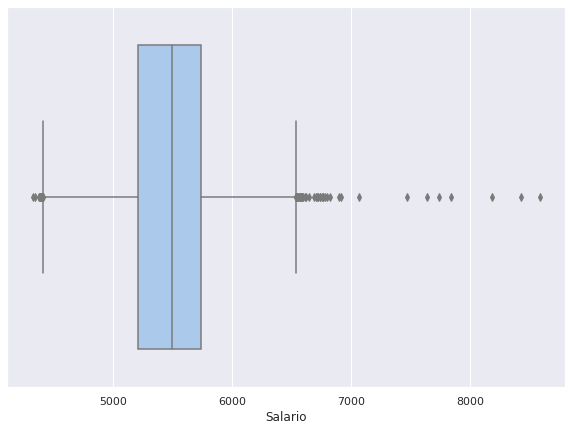

In [ ]:
# Boxplots

sns.boxplot(x=dados['Salario'], palette='pastel')

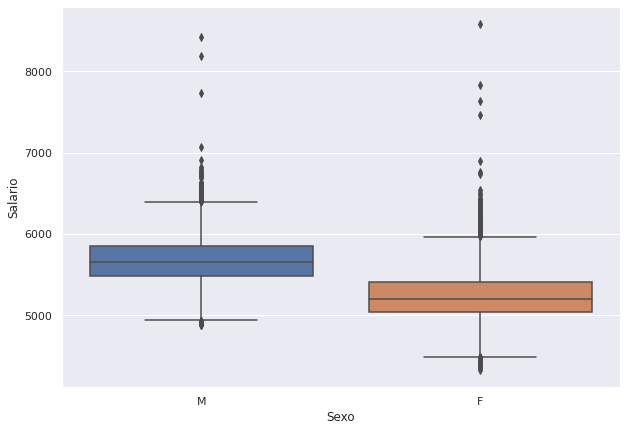

In [ ]:
# Boxplots

sns.boxplot(y=dados['Salario'], x=dados['Sexo'])

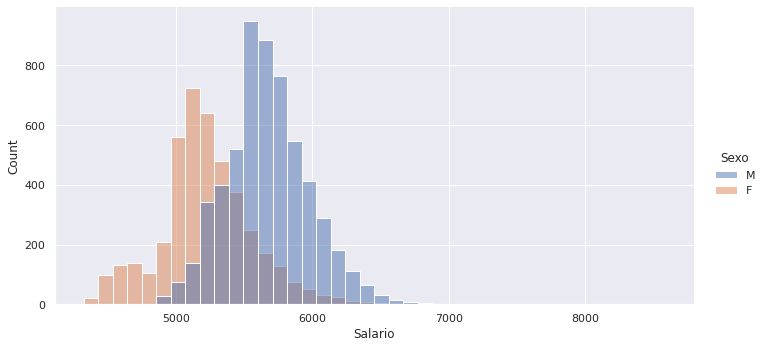

In [ ]:
# Histogramas por grupos

sns.displot(x=dados['Salario'], hue=dados['Sexo'],  kde=False, bins=40, height=5, aspect=2);

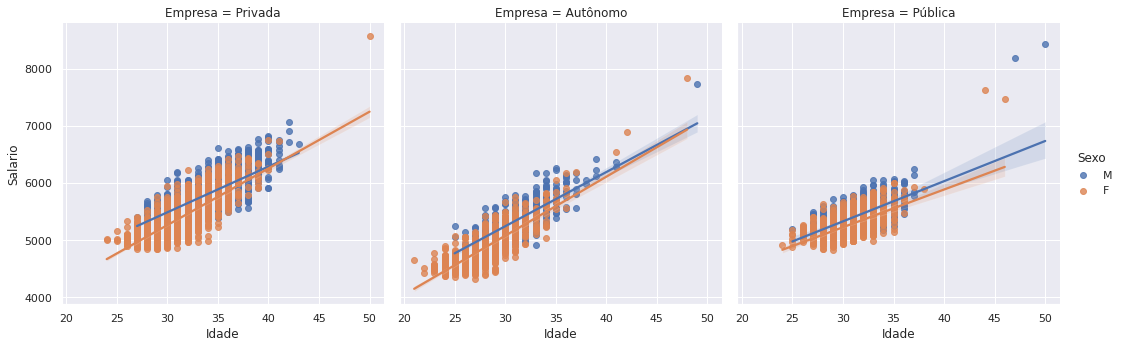

In [ ]:
# Associação entre 4 variáveis - com regressão linear entre as duas quantitativas

sns.lmplot(x='Idade', y='Salario', hue='Sexo', col='Empresa',  data=dados);

## Modelo de regressão logística

In [ ]:


# Divisão da base em treino e teste
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [ ]:
preditoras = dados_treino[['Idade','Devedor_cartao','Salario','Saldo_cc']]
resposta = dados_treino[['Inadimplente']]

In [ ]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.6
Date:                Sun, 23 Oct 2022   Deviance:                       5509.3
Time:                        16:17:02   Pearson chi2:                 6.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.2937      0.023     12.

In [ ]:
ajustado = res.predict(preditoras)

In [ ]:
X_teste = dados_teste[['Idade','Devedor_cartao','Salario','Saldo_cc']]
Y_teste = dados_teste[['Inadimplente']]

predito = res.predict(X_teste)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)

0.11718605065275366

In [ ]:
res.aic

5517.250702469542

## Motivação - Séries Temporais

### Exemplo: Dados de COVID-19 no estado do Amazonas

Fonte: Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, de 02/02/2021 a 31/08/2021, fonte original [https://brasil.io/datasets/](https://brasil.io/datasets/) (acesso em 08/03/2021). Os dados após pré-processamento podem ser encontrados em https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidAM%20-%20covidAM.csv

In [ ]:
#Carregar pacotes

import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import seaborn as sns

# Ajuste de estilo de gráficos
sns.set_theme(style="darkgrid")

plt.rcParams["figure.figsize"] = (10,7)



In [ ]:
# Leitura dos dados

covid = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidAM%20-%20covidAM.csv', parse_dates=True, index_col=0)
covid

,confirmed,deaths
date,,
2021-01-02,293,30
2021-01-03,546,20
2021-01-04,559,23
2021-01-05,1928,46
2021-01-06,2192,86
...,...,...
2021-08-27,131,2
2021-08-28,126,3
2021-08-29,63,2


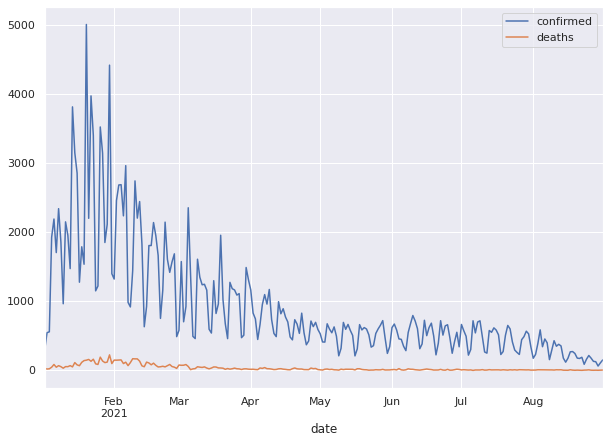

In [ ]:
covid.plot();

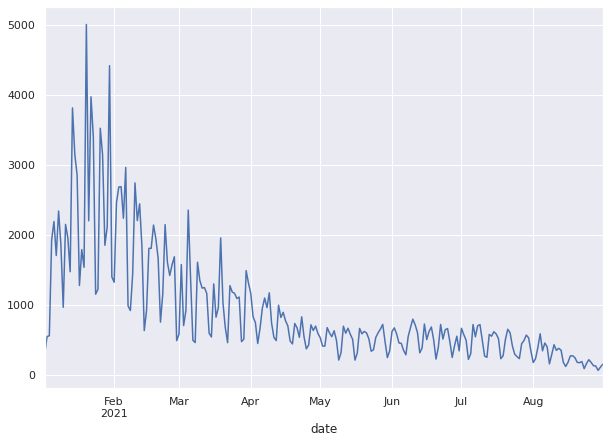

In [ ]:
covid['confirmed'].plot();

### Motivação - Tendência e Sazonalidade

Considere o problema de decompor a série de mortes em **tendência, sazonalidade e resíduos (ruído)**. São conceitos que veremos adiante, mas usamos este problema para motivar o estudo de séries temporais.

In [ ]:
# Instale o pacote statsmodels se necessário - No colab não será necessário
#!pip show statsmodels

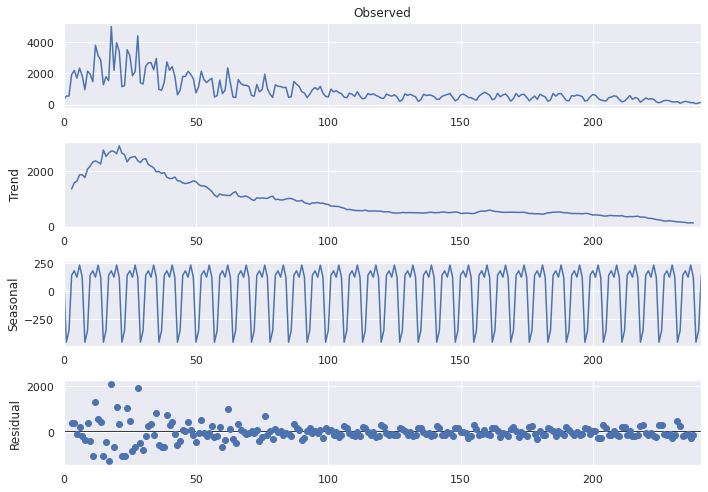

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# y aqui são as mortes em SP

y = covid['confirmed']

mortes = np.array(y)

result = seasonal_decompose(mortes, model='additive', period=7)
result.plot()

pyplot.show()

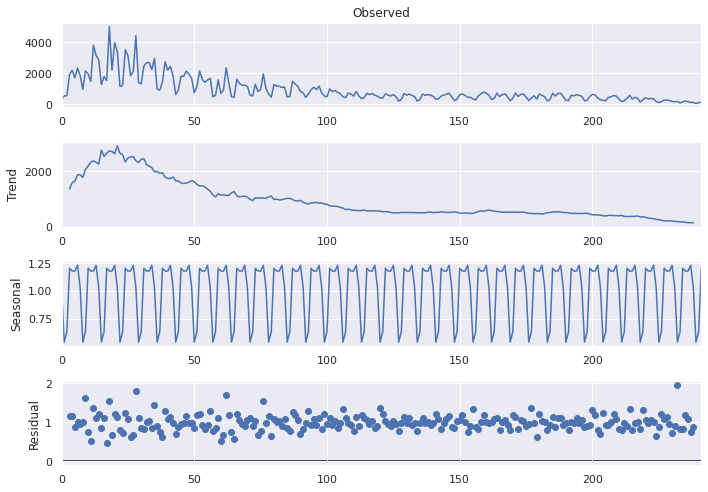

In [ ]:
mortes = np.array(y)
mortes_pos = mortes[mortes>0]

result = seasonal_decompose(mortes_pos, model='multiplicative', period=7)
result.plot()

pyplot.show()

# Suavização e Alisamento exponencial

Referências:

- Morettin, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. Análise de Séries Temporais. ICMC USP. 2009.





Alguns procedimentos de suavização:

- Médias móveis

- Medianas móveis

- Lowess

- Métodos de Holt-Winters




## Média móvel simples


Dadas as observações $Z_1,\ldots,Z_N$, a média móvel é dada por

$$Z_t^{\star} = M_t = \displaystyle{\frac{Z_t+Z_{t-1}+\ldots +Z_{t-(r+1)}}{r}},$$

ou

$$Z_t^{\star} = M_t = M_{t-1} + \displaystyle{\frac{Z_t-Z_{t-r}}{r}}$$



In [ ]:
# Médias móveis para dados de passageiros aéreos

import pandas as pd
import numpy as np
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,7)


Podemos criar uma média móvel simples usando a função mean em rolling (janela deslizante).


In [ ]:
covid['MMS-6-meses'] = covid['confirmed'].rolling(window=6).mean()
covid['MMS-12-meses'] = covid['confirmed'].rolling(window=12).mean()

In [ ]:
covid.head(15)

,confirmed,deaths,MMS-6-meses,MMS-12-meses
date,,,,
2021-01-02,293,30,NaN,NaN
2021-01-03,546,20,NaN,NaN
2021-01-04,559,23,NaN,NaN
2021-01-05,1928,46,NaN,NaN
2021-01-06,2192,86,NaN,NaN
2021-01-07,1706,46,1204.000000,NaN
2021-01-08,2342,69,1545.500000,NaN
2021-01-09,1856,54,1763.833333,NaN
2021-01-10,965,32,1831.500000,NaN


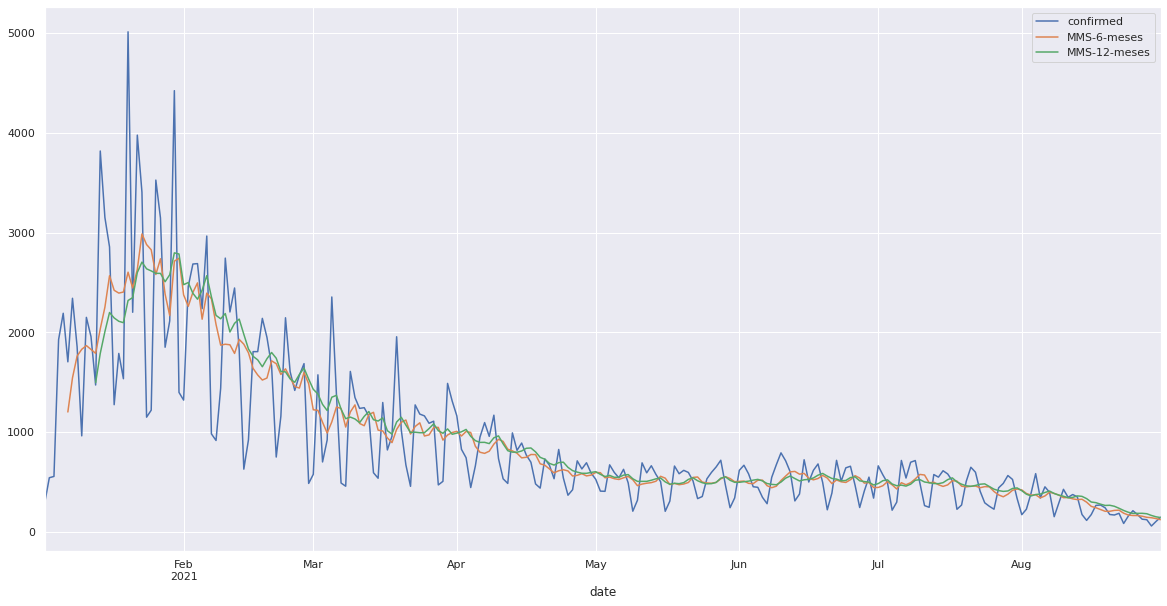

In [ ]:
covid[['confirmed', 'MMS-6-meses', 'MMS-12-meses']].plot(figsize=(20,10));

In [ ]:
covid['MMEP12'] = covid['confirmed'].ewm(span=12,adjust=False).mean()

In [ ]:
covid

,confirmed,deaths,MMS-6-meses,MMS-12-meses,MMEP12
date,,,,,
2021-01-02,293,30,NaN,NaN,293.000000
2021-01-03,546,20,NaN,NaN,331.923077
2021-01-04,559,23,NaN,NaN,366.857988
2021-01-05,1928,46,NaN,NaN,607.033682
2021-01-06,2192,86,NaN,NaN,850.874654
...,...,...,...,...,...
2021-08-27,131,2,160.666667,189.916667,192.089627
2021-08-28,126,3,150.000000,185.666667,181.921992
2021-08-29,63,2,145.833333,168.500000,163.626301


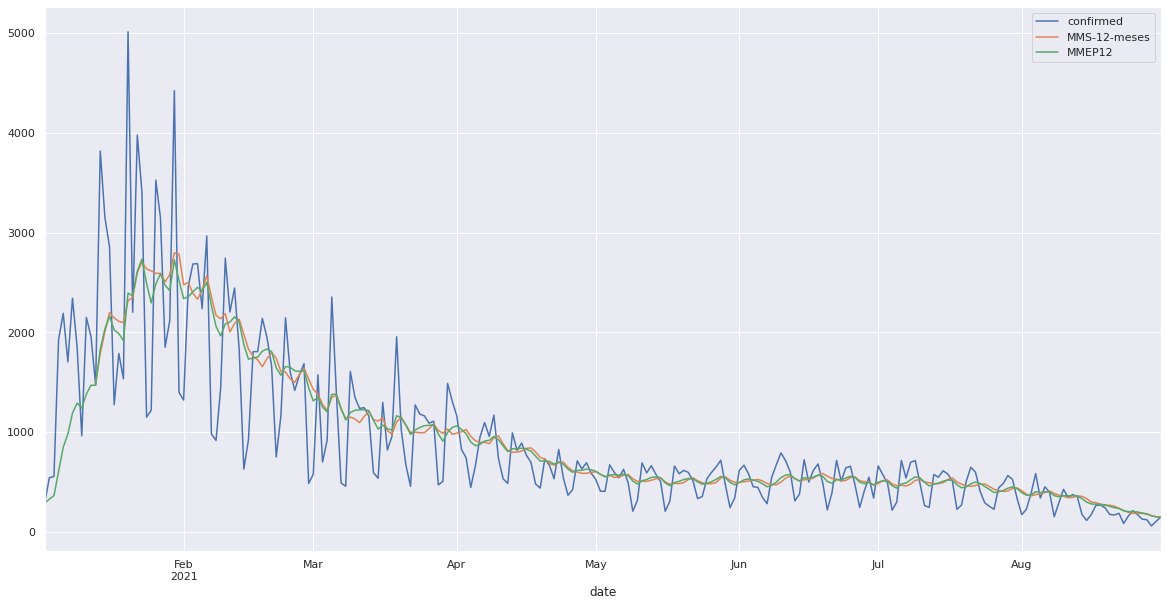

In [ ]:
covid[['confirmed','MMS-12-meses','MMEP12']].plot(figsize=(20,10));

**Exercício**
Repita para 14 dias e span=14.
Compare esses resultados com os gráficos com 5 dias e span=5.
Você nota alguma relação com esses parâmetros e a suavidade da curva?

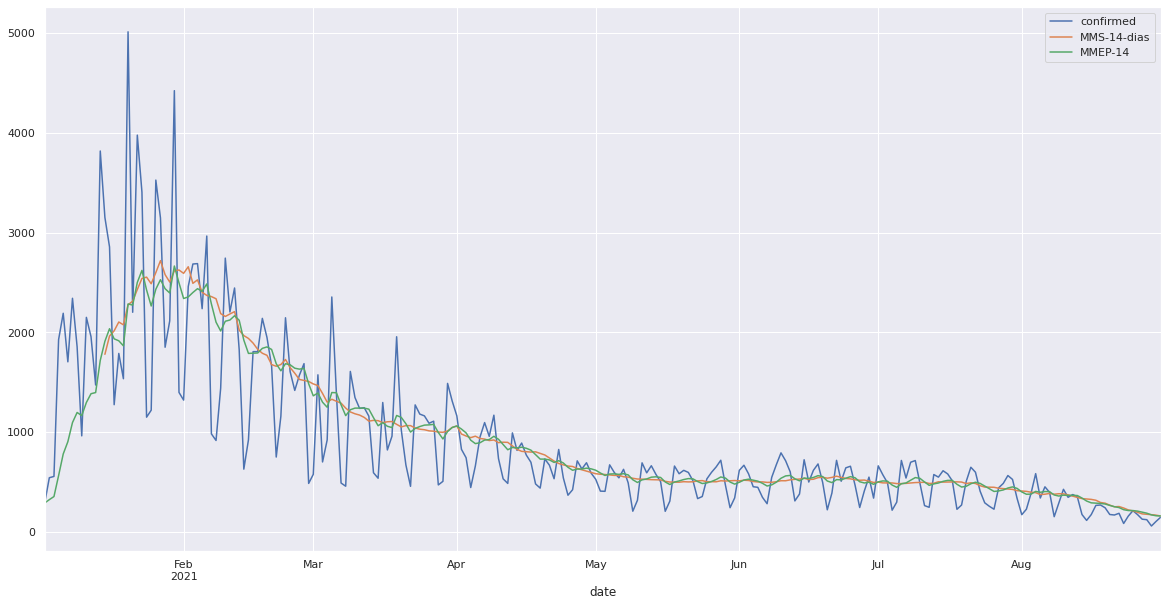

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

covid['MMS-14-dias'] = covid['confirmed'].rolling(window=14).mean()
covid['MMEP-14'] = covid['confirmed'].ewm(span=14,adjust=False).mean()
covid[['confirmed','MMS-14-dias','MMEP-14']].plot(figsize=(20,10)).autoscale(axis='x',tight=True);

## Exercício

Busque a implementação de métodos conhecidos na literatura para modelagem de séries temporais, como Holt-Winters, Theta, ARIMA, e outros.